In [67]:
import pandas as pd
import numpy as np
import math
import random 
import matplotlib.pyplot as plt
import os
import timeit
import time
import pandas as pd
import csv
from scipy.optimize import curve_fit

In [108]:
#Kuramoto model on Watts Strogatz network. 

def func(x,a,b): #curve to fit the generated data
    return a*(1/x)+b


def RKSTR1(N,n,T,p,dt,K,D): 

    df = D
    r=np.zeros(len(K))
    
    tic=time.process_time()
    #loop over K values
    for l in range(0,len(K)):
        #Initialize
        tht=np.random.uniform(low=0.0, high=2*np.pi, size=N) #random initial configuration of N oscillators
        omg=np.random.normal(0, 1, N) #sample of normally distributed angular frequencies
        THT=np.zeros([len(tht),len(T)])
        THT[:,0]=tht
        arr_from_idxs = np.asarray(df[0])

        for i in range(0,len(T)-1):
            print("sim at K=%d %d/%d"%(l, i,T[-1]/dt))
            for j in range(0,N): 
                SUM=0
                from_idx = np.where(arr_from_idxs==j)[0][0]
                deg_of_edges = df.iloc[from_idx][2]
                for k in range(from_idx,deg_of_edges+from_idx):
                    to_idx = df.iloc[k][1]           
                    #print("From",j," To",to_idx)
                    SUM=SUM+np.sin(THT[to_idx,i]-THT[j,i])                   
                THT[j,i+1]=THT[j,i]+ dt*(omg[j]+K[l]/2/n*SUM)  
                #print("Sum given to ",j)
                
        
        A=np.exp(1j*THT[:,len(T)-2])
        V=1/N*np.sum(A)
        r[l]=np.abs(V)
            
    

    toc=time.process_time()
    
    np.savetxt("pvsK_N%d_n%d_p=0.00.csv" %(N,n), r, delimiter=",")
    
    print("Time taken for 1 p is %.2f seconds" %(toc-tic))

    
    return r

In [15]:
df1=pd.read_csv("extended_adj_mat_p=0.00_r=3.00.csv",header=None)
df2=pd.read_csv("extended_adj_mat_p=0.05_r=3.00.csv",header=None)
df3=pd.read_csv("extended_adj_mat_p=0.10_r=3.00.csv",header=None)
df4=pd.read_csv("extended_adj_mat_p=0.20_r=3.00.csv",header=None)
df5=pd.read_csv("extended_adj_mat_p=0.30_r=3.00.csv",header=None)
df6=pd.read_csv("extended_adj_mat_p=0.40_r=3.00.csv",header=None)
df7=pd.read_csv("extended_adj_mat_p=0.50_r=3.00.csv",header=None)
df8=pd.read_csv("extended_adj_mat_p=0.60_r=3.00.csv",header=None)
df9=pd.read_csv("extended_adj_mat_p=0.70_r=3.00.csv",header=None)
df10=pd.read_csv("extended_adj_mat_p=0.80_r=3.00.csv",header=None)
df11=pd.read_csv("extended_adj_mat_p=0.90_r=3.00.csv",header=None)
df12=pd.read_csv("extended_adj_mat_p=1.00_r=3.00.csv",header=None)

In [ ]:
N=2000
n=3
dt=0.05
T=np.arange(0,80,dt)


K1,K2,K3=np.arange(12,17,1), np.arange(6,8.5,0.5), np.arange(3.8,4.8,0.2)
K4,K5,K6=np.arange(2.5,3.5,0.2), np.arange(2,3,0.2), np.arange(2,2.5,0.1)
K7,K8,K9=np.arange(1.9,2.4,0.1), np.arange(1.8,2.3,0.1), np.arange(1.7,2.2,0.1)
K10,K11,K12=np.arange(1.7,2.2,0.1), np.arange(1.7,2.2,0.1), np.arange(1.7,2.2,0.1)



D=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
p=[0.00,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

RR=np.zeros([len(K),len(p)])

for i in range(len(p)):
    RR[:,i]=RKSTR1(N,n,T,p[i],dt,K[i],D[i])

In [44]:
Kc=np.zeros(len(p))
K=[K1,K2,K3,K2,K3,K4,K4,K5,K6,K7,K8,K9,K10,K11,K12]

for i in range(0,len(p)):
    idx = (np.abs(RR[:,i]-0.5)).argmin()
    Kc[i]=K[i][idx]

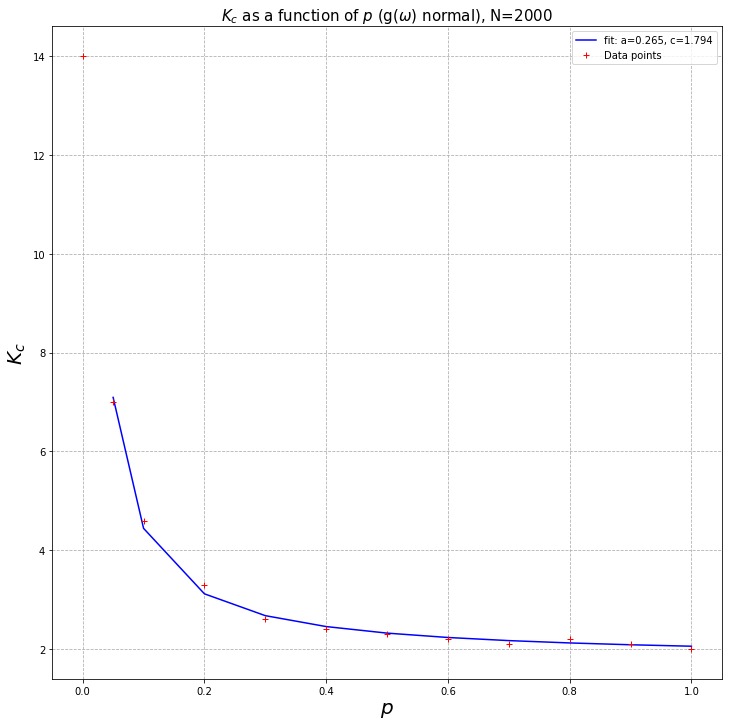

In [125]:
popt, pcov = curve_fit(func, p[1:], Kc[1:], bounds=(0,20))
plt.figure(figsize=(12,12))
plt.plot(p[1:], func(p[1:], *popt), 'b-', label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(p,Kc,"r+", label="Data points")
plt.grid(ls="--")
plt.title("$K_c$ as a function of $p$ (g($\omega$) normal), N=2000 ",  fontsize=15)
plt.ylabel("$K_c$",fontsize=20)
plt.xlabel("$p$",fontsize=20)
plt.legend()
plt.savefig("Kcvspfor_N=%d.png" % N)